<a href="https://colab.research.google.com/github/RSK11547210/saikrishna_INFO5502_spring2022/blob/main/lab_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [1]:
# Your answer here (code + explanation):
import pandas
from zipfile import ZipFile
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#reading zip file
with ZipFile('/content/sample_data/preprocessed_cases[cases_29404].zip', 'r') as zipObj:
   fle_lst=zipObj.infolist()


catgrs = []
parent_dir = 'preprocessed_cases[cases_29404]/'
for j in fle_lst:
  if(j.is_dir() and j.filename!= parent_dir):
    catgrs.append(int(j.filename.split('/')[-2]))
print('1) Total categories are ',len(catgrs))


catgrs.sort()
for i in catgrs:
  doc_count = 0
  for j in fle_lst:
    if(j.is_dir()==False and j.filename.startswith(parent_dir+str(i)+'/')):
      doc_count+=1
  print(' Total number of documents in {} category is {}'.format(i,doc_count))


sentence_count=0
fle_count =0
wrds =[]
stop_words = stopwords.words('english')


with ZipFile('/content/sample_data/preprocessed_cases[cases_29404].zip', 'r') as zipObj:
  for j in fle_lst:
    if(j.is_dir()==False):
      fle_count+=1
      cntnt_f=zipObj.open(j.filename,'r')
      cntnt=cntnt_f.read()

      wrds.extend(cntnt.decode().split())
      sentence_count+= str(cntnt).count('.')+str(cntnt).count('?')+str(cntnt).count('!')
      
 
except_stop_words=[str(word) for word in wrds if str(word).lower() not in stop_words]

print('Average sentences: ', sentence_count/fle_count ) 
print('Average words: ', len(wrds)/fle_count)
print('Top 50 terms and frequencies:', Counter(except_stop_words).most_common(50))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
1) Total categories are  76
 Total number of documents in 1 category is 775
 Total number of documents in 2 category is 179
 Total number of documents in 3 category is 184
 Total number of documents in 4 category is 231
 Total number of documents in 5 category is 751
 Total number of documents in 6 category is 380
 Total number of documents in 7 category is 621
 Total number of documents in 8 category is 521
 Total number of documents in 9 category is 744
 Total number of documents in 10 category is 584
 Total number of documents in 11 category is 605
 Total number of documents in 12 category is 275
 Total number of documents in 13 category is 458
 Total number of documents in 14 category is 277
 Total number of documents in 15 category is 257
 Total number of documents in 16 category is 826
 Total number of documents in 17 category is 125
 Total number of documents in

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

Description of columns: 
          ge  cst   tnp   twp  iap   esp  arr         ms   ls    as  ...   fq  \
count   131  131   131   131  131   131  131        131  131   131  ...  131   
unique    2    5     4     4    4     4    2          1    2     2  ...    6   
top       M  OBC  Good  Good   Vg  Good    N  Unmarried    V  Paid  ...   Um   
freq     72   57    59    65   63    54   78        131   92    76  ...   40   

         mq       fo         mo     nf       sh    ss   me     tt   atd  
count   131      131        131    131      131   131  131    131   131  
unique    6        5          5      3        3     2    4      3     3  
top      Um  Service  Housewife  Large  Average  Govt  Eng  Small  Good  
freq     52       38        115     58       59    91   62     78    56  

[4 rows x 22 columns]
Visualization of counts for study hours: 
 Average    59
Poor       45
Good       27
Name: sh, dtype: int64
Factor plot for StudyHours (sh) vs EndSemesterPercentage(esp):


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


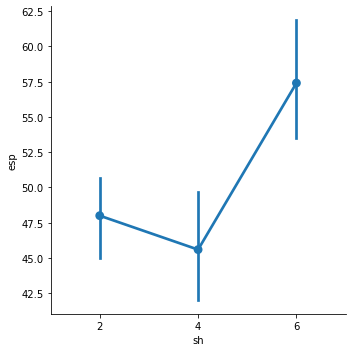

Heat map for correlation data:


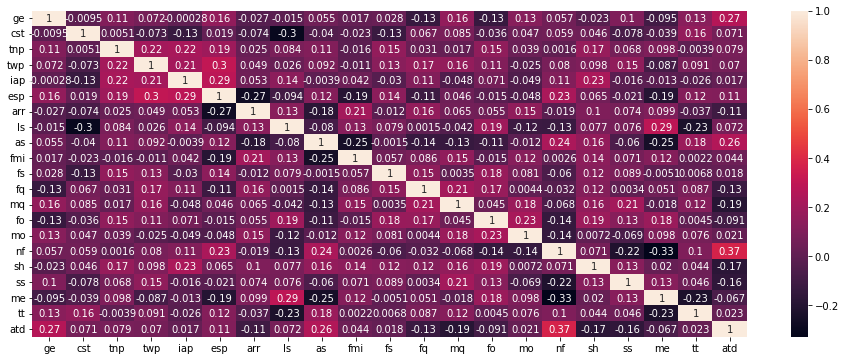

In [8]:
# Your answer here (code + explanation):


import pandas
import seaborn
import numpy
import matplotlib.pyplot as plt

#reading csv using pandas
df=pandas.read_csv('/content/sample_data/lab-assignment-04-student-performance.csv')
print('Description of columns: \n',df.describe())

print('Visualization of counts for study hours: \n',df['sh'].value_counts())


df['sh'].replace(['Good','Average','Poor'],[6,4,2],inplace=True)
df['esp'].replace(['Best','Vg','Good','Pass','Fail'],[80,60,45,30,20],inplace=True)
#plotting factor plot using seaborn.

print('Factor plot for StudyHours (sh) vs EndSemesterPercentage(esp):')
seaborn.factorplot(data=df, x='sh',y='esp')
plt.show()


df.drop(columns=['ms'], inplace=True)
df=df.apply(lambda x: pandas.factorize(x)[0])

corre_df = df.corr()

plt.figure(figsize=(16, 6))
print('Heat map for correlation data:')
seaborn.heatmap(data=corre_df,annot=True)
plt.show()





Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [6]:
# Your three questions:

'''
Please list your questions here:

Downloaded a dataset which contains the basket Ball team stats for the entire year

questions:
1. Palyer with Max. points 
2. players with 10 plus points 
3. who has the highest points from Atlanta Basketball Team.


'''

'\nPlease list your questions here:\n\nDownloaded a dataset which contains the basket Ball team stats for the entire year\n\nquestions:\n1. Palyer with Max. points \n2. players with 10 plus points \n3. who has the highest points from Atlanta Basketball Team.\n\n\n'

In [2]:
# You code to answer the three questions (Please add comments in the code):

import pandas as pd 

link= 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'

df=pd.read_html(link,header=0)
final_df=df[0]

df_clean = final_df.drop(final_df[final_df.Age == 'Age'].index)
df1 = df_clean.fillna(0)

df1.to_csv('nba.csv', index=False)
new_df=pd.read_csv('nba.csv')
new_df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
139,108,John Collins,PF,21,ATL,61,59,30.0,7.6,13.6,...,0.763,3.6,6.2,9.8,2.0,0.4,0.6,2.0,3.3,19.5


In [3]:
#4th question---1)player with max. points 
max_pnts=new_df[new_df.PTS == new_df.PTS.max()]
max_pnts

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
270,207,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


In [4]:
#4th question---2)players with 10 plus points
plyrs_10plus=new_df[new_df.PTS > 10]
plyrs_10plus

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
7,8,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
10,11,Jarrett Allen,C,20,BRK,80,80,26.2,4.2,7.1,...,0.709,2.4,6.0,8.4,1.4,0.5,1.5,1.3,2.3,10.9
19,18,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
21,20,Carmelo Anthony,PF,34,HOU,10,2,29.4,4.9,12.1,...,0.682,0.9,4.5,5.4,0.5,0.4,0.7,0.8,3.2,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,522,Delon Wright,PG,26,MEM,26,11,30.8,4.4,10.2,...,0.742,1.1,4.3,5.4,5.3,1.6,0.6,1.5,1.9,12.2
698,525,Thaddeus Young,PF,30,IND,81,81,30.7,5.5,10.4,...,0.644,2.4,4.1,6.5,2.5,1.5,0.4,1.5,2.4,12.6
699,526,Trae Young,PG,20,ATL,81,81,30.9,6.5,15.5,...,0.829,0.8,2.9,3.7,8.1,0.9,0.2,3.8,1.7,19.1
700,527,Cody Zeller,C,26,CHO,49,47,25.4,3.9,7.0,...,0.787,2.2,4.6,6.8,2.1,0.8,0.8,1.3,3.3,10.1


In [5]:
#4th question---3)highest (PTS) in the Atlanta Basketball team
Atlanta_BT = new_df.groupby('Tm').get_group('ATL')
Atlanta_BT[Atlanta_BT.PTS == Atlanta_BT.PTS.max()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
139,108,John Collins,PF,21,ATL,61,59,30.0,7.6,13.6,...,0.763,3.6,6.2,9.8,2.0,0.4,0.6,2.0,3.3,19.5
